# **OBJECT RECOGNITION WITH CNN**

**IMPORTING THE LIBRARIES**

In [1]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
import keras 


**LOADING THE DATASET** 

In [4]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [5]:
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [8]:
print(X_train[0].shape)

(32, 32, 3)


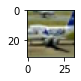

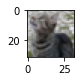

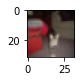

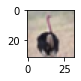

In [9]:

for i in range(332,336):
    plt.subplot(120+ 1 + i)
    img = X_train[i]
    plt.imshow(img)
    plt.show()
    

**DATA PRE-PROCESSING**

In [10]:


X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


X_train /= 255
X_test=X_test/255
n_classes = 10


print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)


Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


**BUILDING THE MODEL** 

In [11]:


from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten



model = Sequential()
#convolutional layers
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling 
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model 
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
391/391 [==============================] - 422s 1s/step - loss: 1.8451 - accuracy: 0.3136 - val_loss: 1.1933 - val_accuracy: 0.5723
Epoch 2/10
391/391 [==============================] - 426s 1s/step - loss: 1.1519 - accuracy: 0.5871 - val_loss: 0.9148 - val_accuracy: 0.6873
Epoch 3/10
391/391 [==============================] - 427s 1s/step - loss: 0.9254 - accuracy: 0.6755 - val_loss: 0.8252 - val_accuracy: 0.7166
Epoch 4/10
391/391 [==============================] - 428s 1s/step - loss: 0.8178 - accuracy: 0.7141 - val_loss: 0.8100 - val_accuracy: 0.7169
Epoch 5/10
391/391 [==============================] - 433s 1s/step - loss: 0.7210 - accuracy: 0.7489 - val_loss: 0.7027 - val_accuracy: 0.7530
Epoch 6/10
391/391 [==============================] - 431s 1s/step - loss: 0.6511 - accuracy: 0.7716 - val_loss: 0.6942 - val_accuracy: 0.7599
Epoch 7/10
391/391 [==============================] - 427s 1s/step - loss: 0.5739 - accuracy: 0.7994 - val_loss: 0.7067 - val_accuracy: 0.7584

**PREDICTION MODEL**

In [12]:
classes = range(0,10)

names = ['airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']

# zip the names and classes to make a dictionary of class_labels
class_labels = dict(zip(classes, names))

# generate batch of 9 images to predict
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109],axis=-1)

# make predictions
predictions = model.predict(batch, verbose = 1)

1/1 [==============================] - 1s 545ms/step


In [13]:
print (predictions)

[[5.55249397e-04 8.51772929e-05 1.47074625e-01 1.33409187e-01
  1.71057090e-01 1.88029140e-01 2.24105711e-03 3.56806755e-01
  2.40526409e-04 5.01249917e-04]
 [1.05147570e-04 1.65938673e-05 4.23241928e-02 2.34761238e-01
  5.87483719e-02 3.83523285e-01 5.14986664e-02 2.28878587e-01
  7.01829995e-05 7.36748480e-05]
 [6.24023585e-07 1.94302788e-06 3.20020923e-03 1.85166043e-03
  6.86533385e-05 1.67581858e-03 9.93182838e-01 1.28327447e-05
  1.91528443e-06 3.45306603e-06]
 [1.87560801e-07 2.94940214e-08 1.18482414e-04 9.15882587e-01
  3.72591137e-04 6.25045365e-03 7.73695111e-02 5.95779193e-06
  1.76510383e-07 8.91952183e-08]
 [3.34941745e-07 9.99019265e-01 3.46228309e-13 1.88272967e-10
  2.78029487e-12 8.65501507e-12 1.83570537e-11 3.10850716e-12
  2.28008571e-06 9.78040276e-04]
 [5.91620797e-08 9.99900222e-01 1.04483505e-11 1.34902575e-11
  1.61332089e-13 3.26453686e-12 1.26276245e-09 4.46170471e-14
  6.80693711e-06 9.28508671e-05]
 [2.77180094e-02 5.68211428e-04 1.22071072e-01 1.53681859e

In [14]:
for image in predictions:
    print(np.sum(image))

1.0
0.99999994
0.9999999
1.0000001
0.99999994
0.99999994
0.9999998
1.0
0.99999994


In [15]:
class_result = np.argmax(predictions,axis=-1)
print (class_result)

[7 5 6 3 1 1 6 6 8]


**FINAL OBJECT RECOGNITION MODEL**

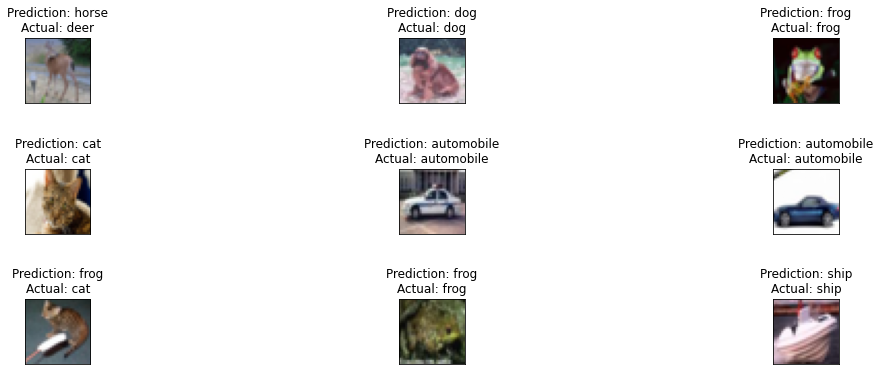

In [16]:

fig, axs = plt.subplots(3, 3, figsize = (19,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    # plot the image
    axs[i].imshow(img)
    
# show the plot
plt.show()